<h1 style="font-size:2.1em;
           font-family: Calibri
           padding: 20px;
           margin: 20px;
           height: 100px;
           line-height: 100px;
           align-items: center;
           text-align: center;
           border: 3px solid #006400;
           background-color: #f1f1f1;
           ">Covid Tweet Vols & Emoji Sentiment vs Price - Losers</h1>

In [1]:
#import packages
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import nltk
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime, timedelta

In [2]:
UALTweets_In = pd.read_csv("./Data/CompanyTweets/Tweets UAL 20200119 to 20200418.csv"); UALTweets = UALTweets_In.copy()
MARTweets_In = pd.read_csv("./Data/CompanyTweets/Tweets MAR 20200119 to 20200418.csv"); MARTweets = MARTweets_In.copy()
WBATweets_In = pd.read_csv("./Data/CompanyTweets/Tweets WBA 20200119 to 20200418.csv"); WBATweets = WBATweets_In.copy()
UALTweets.head()

,Created,Text,User,Company,Symbol,TwitterTerm
0,2020-04-17,"#LosAngeles to Kigali, Rwanda for only $624 ro...",SecretFlying,United Airlines Holdings Inc.,UAL,@united
1,2020-04-17,@ United paid how much in Taxes last year? I a...,TrickyWizard,United Airlines Holdings Inc.,UAL,@united
2,2020-04-17,I support @united but to be hold an hour. Spea...,iamKimAlbert,United Airlines Holdings Inc.,UAL,@united
3,2020-04-17,#unitedAIRLINES please tell ur call center age...,iamKimAlbert,United Airlines Holdings Inc.,UAL,@united
4,2020-04-17,.@united in Denver your cleaning staff and fli...,CindyKChambers,United Airlines Holdings Inc.,UAL,@united


### Look at Number of Tweets vs Price

In [3]:
#get a company's ticker using a key
API_Key = os.environ['QUANDLTEMP'] 
quandl.ApiConfig.api_key = API_Key

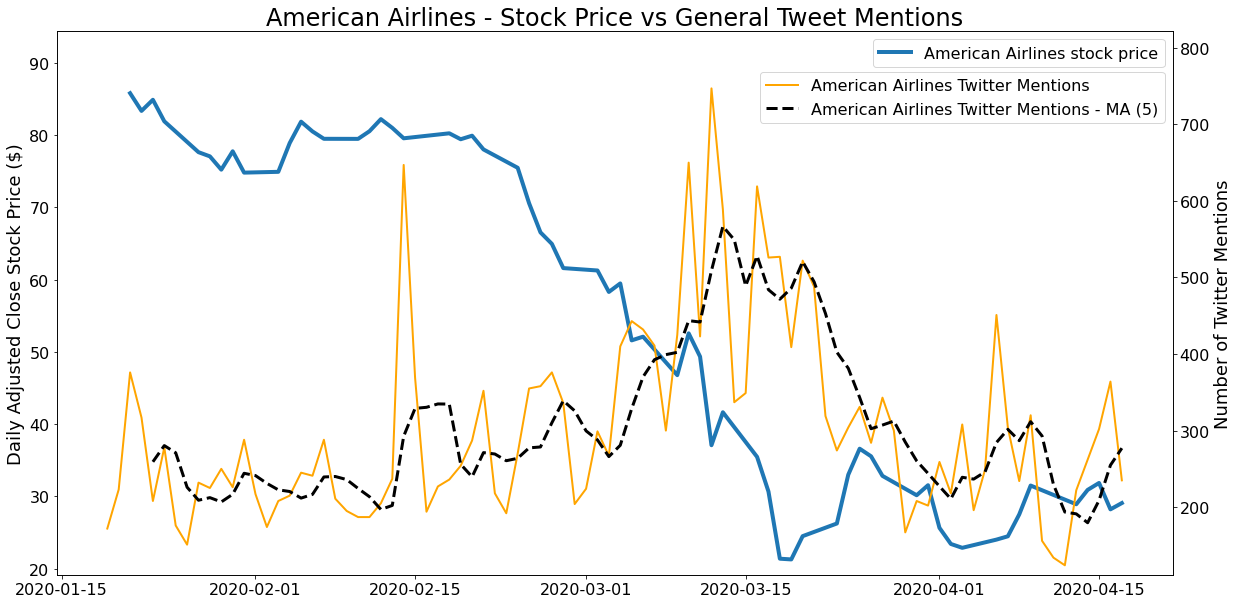

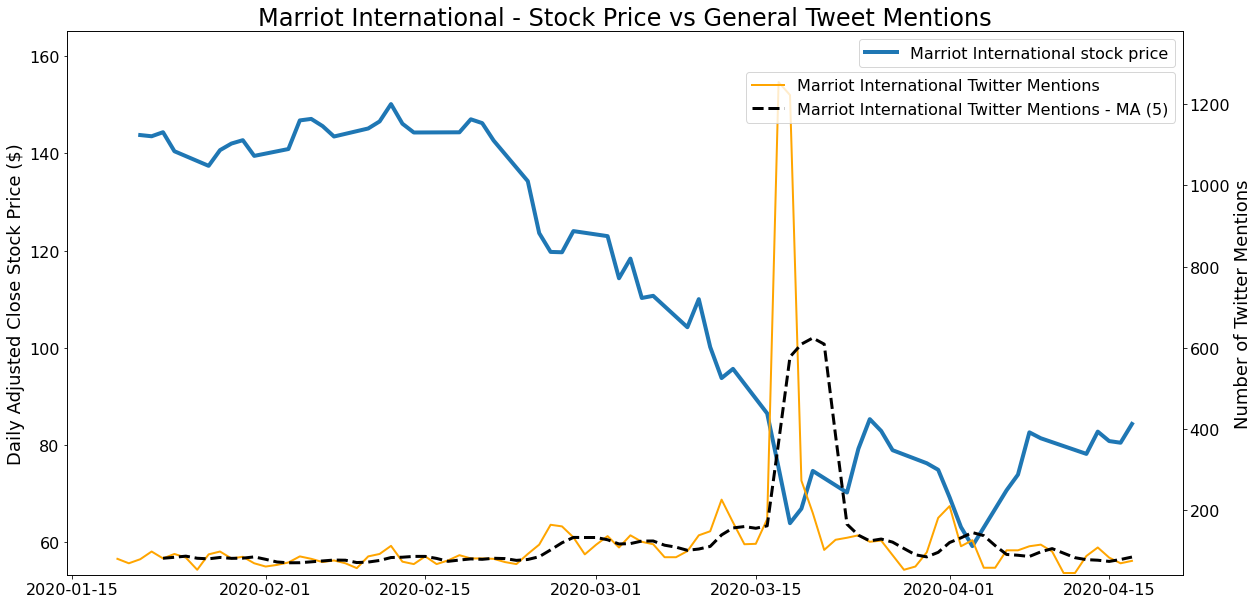

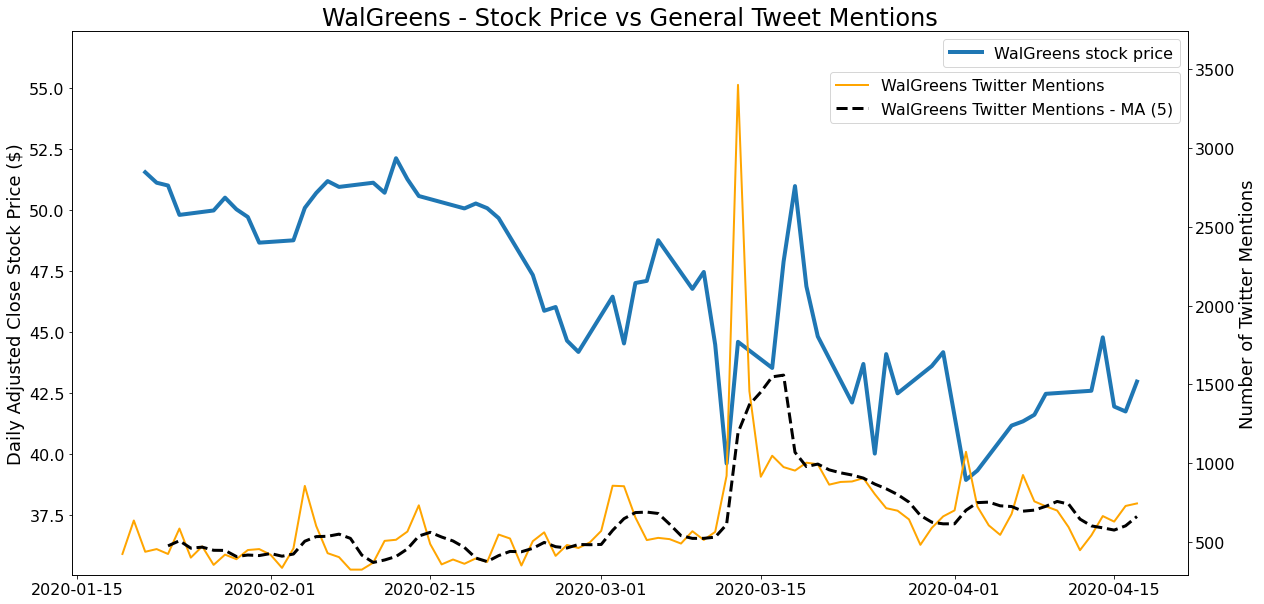

In [4]:
def CreateVolvsPriceChart(Tweetdf, ticker, Company):
    
    tweetdf = Tweetdf.pivot_table(index='Created', values='Text', aggfunc='count')
    tweetdf.index.names = ['Date']
    tweetdf.index = pd.to_datetime(tweetdf.index)
    tweetdf.rename(columns={'Text':'Count'}, inplace=True)
    tweetdf['Count_MA'] = tweetdf['Count'].rolling(window=5).mean()
    #     display(tweetdf)   
    
    
    
    #Obtain Stockmarket Data
    stockdf = quandl.get(f"EOD/{ticker}", start_date='2020-1-19', end_date='2020-4-18')
        
    # Create the Chart
    fig = plt.figure(figsize=(20,10))
    ax1 = plt.axes()
    ax1.plot(stockdf.index, stockdf['Adj_Close'], linewidth=4, label=f"{Company} stock price")
    ax2 = ax1.twinx()
    ax2.plot(tweetdf.index,tweetdf['Count'], color='orange', linewidth=2, label=f"{Company} Twitter Mentions")
    ax2.plot(tweetdf.index,tweetdf['Count_MA'], color='black', linewidth=3, 
             linestyle="--", label=f"{Company} Twitter Mentions - MA (5)")
    
    
    # Plot Titles        
    ax1.set_title(f'{Company} - Stock Price vs General Tweet Mentions' ,size=24)
    ax1.set_ylabel('Daily Adjusted Close Stock Price ($)' ,size=18)
    ax2.set_ylabel('Number of Twitter Mentions' ,size=18)
    
    # Axis sizes
    ax1.xaxis.set_tick_params(labelsize=16)
    ax1.yaxis.set_tick_params(labelsize=16)
    ax2.yaxis.set_tick_params(labelsize=16)
    
    ## Set up the Ranges on The y Axis
    ax1.set_ylim(min(stockdf['Adj_Close'])*0.9,max(stockdf['Adj_Close'])*1.1)
    ax2.set_ylim(min(tweetdf['Count'])*0.9,
                 (max(tweetdf['Count']))*1.1)
    
    
    # Show the legend
    ax1.legend(prop={'size':16}, loc='upper right') 
    ax2.legend(prop={'size':16}, loc='upper right',bbox_to_anchor=(1, 0.94))        
    
    
    plt.show()


CreateVolvsPriceChart(UALTweets, 'UAL', 'American Airlines')
CreateVolvsPriceChart(MARTweets, 'MAR', 'Marriot International')
CreateVolvsPriceChart(WBATweets, 'WBA', 'WalGreens')


Looking at the three charts above, we can see:
* The stock prices of all three companies began to drop around the same point i.e. 18th Feb 2020
* There was a rise in the number of Twitter mentions
    * The rise in the number of Twitter mentions seems inversely correlated with the stock price.
    * The largest rise in the number of Twitter mentions seems to be around the mid to end of the fall in the stock price.

### Look at Number of Covid Related Tweets vs Price

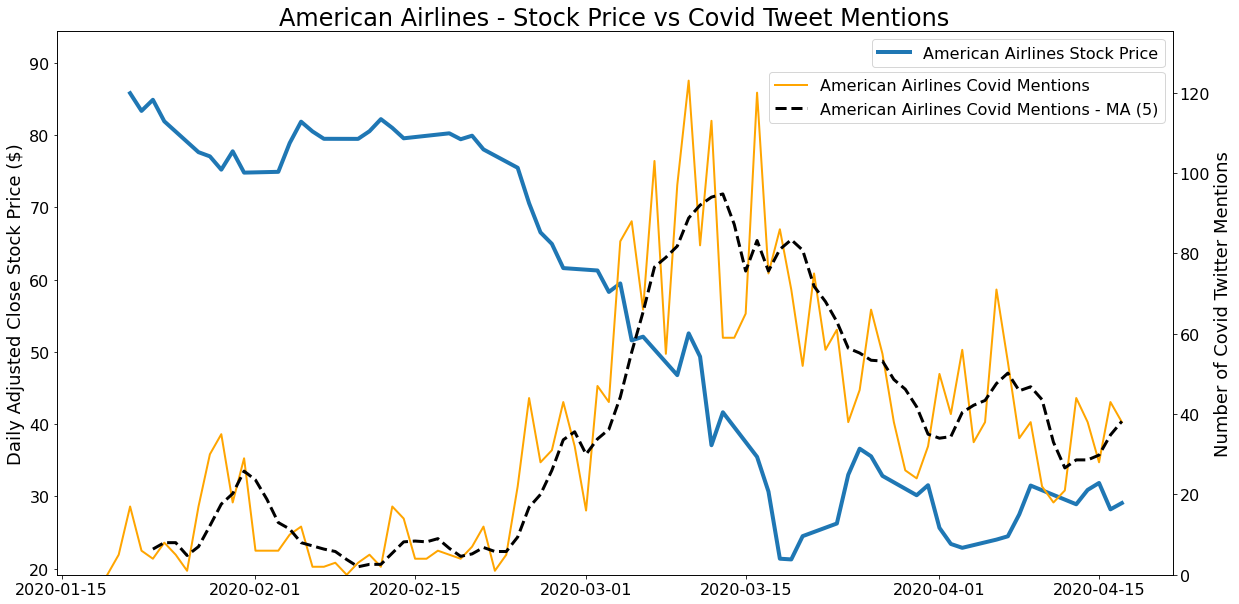

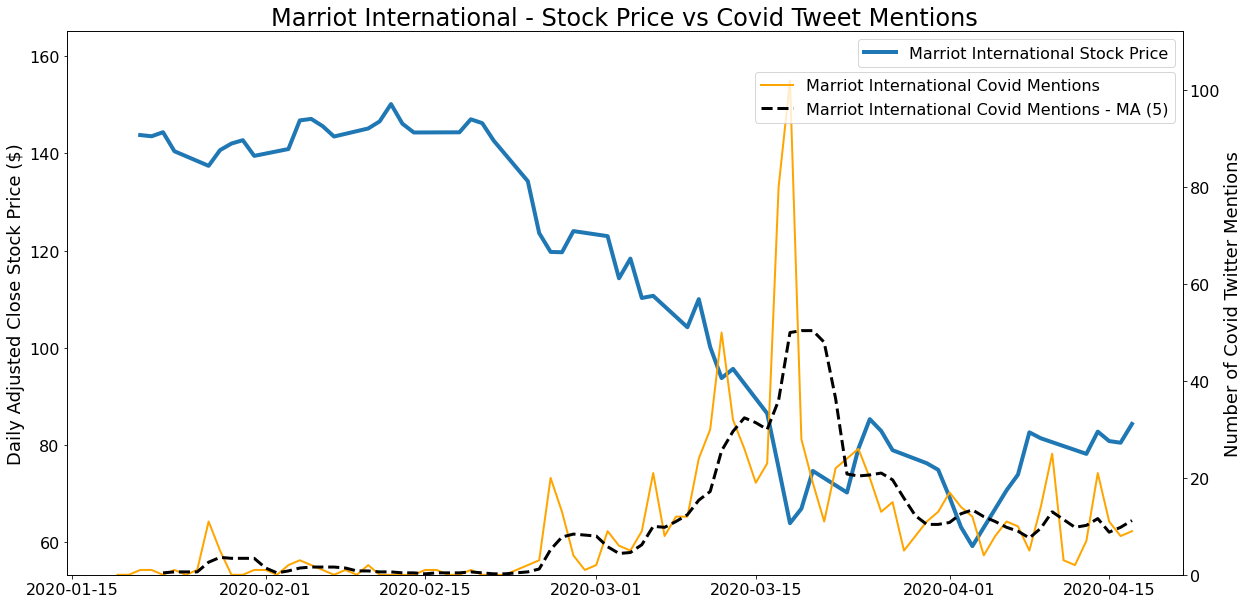

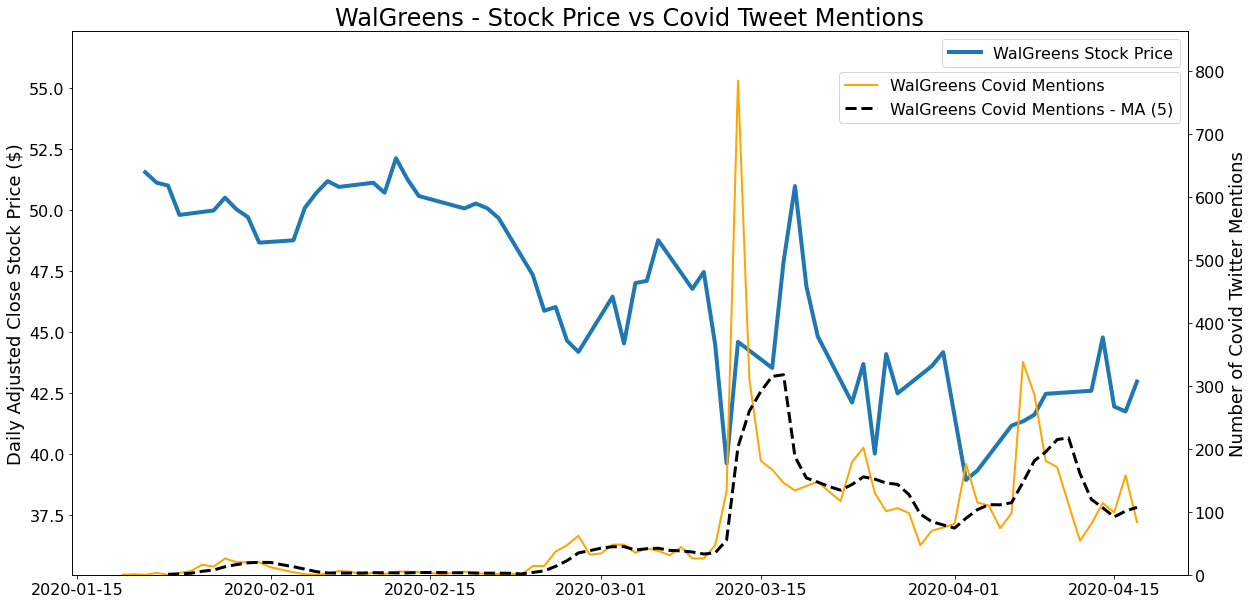

In [5]:
def CreateVolvsCovidMentionsChart(Tweetdf, ticker, Company):
    
    ListofCovidTerms = ['coronavirus', 'covid', 'covid19','mask', '#coronavirus', '#covid','#covid19','#mask']
    pattern = "|".join(ListofCovidTerms)    
    

    # Make tweets lower case, see if it contains any any of the terms
    df = Tweetdf
    df['CovidTermContained'] = df.Text.apply(lambda x: x.lower()).str.contains(pattern).apply(lambda x: int(x))
    
    tweetdf = Tweetdf.pivot_table(index='Created', values='CovidTermContained', aggfunc=np.sum)
    tweetdf.index.names = ['Date']
    tweetdf.index = pd.to_datetime(tweetdf.index)
    tweetdf['CovidContained_MA'] = tweetdf['CovidTermContained'].rolling(window=5).mean()
    #     display(tweetdf)   
    
    
    
    #Obtain Stockmarket Data
    stockdf = quandl.get(f"EOD/{ticker}", start_date='2020-1-19', end_date='2020-4-18')
        
    # Create the Chart
    fig = plt.figure(figsize=(20,10))
    ax1 = plt.axes()
    ax1.plot(stockdf.index, stockdf['Adj_Close'], linewidth=4, label=f"{Company} Stock Price")
    ax2 = ax1.twinx()
    ax2.plot(tweetdf.index,tweetdf['CovidTermContained'], color='orange', linewidth=2, label=f"{Company} Covid Mentions")
    ax2.plot(tweetdf.index,tweetdf['CovidContained_MA'], color='black', linewidth=3, 
             linestyle="--", label=f"{Company} Covid Mentions - MA (5)")
    
    
    # Plot Titles        
    ax1.set_title(f'{Company} - Stock Price vs Covid Tweet Mentions' ,size=24)
    ax1.set_ylabel('Daily Adjusted Close Stock Price ($)' ,size=18)
    ax2.set_ylabel('Number of Covid Twitter Mentions' ,size=18)
    
    # Axis sizes
    ax1.xaxis.set_tick_params(labelsize=16)
    ax1.yaxis.set_tick_params(labelsize=16)
    ax2.yaxis.set_tick_params(labelsize=16)
    
    ## Set up the Ranges on The y Axis
    ax1.set_ylim(min(stockdf['Adj_Close'])*0.9,max(stockdf['Adj_Close'])*1.1)
    ax2.set_ylim(min(tweetdf['CovidTermContained'])*0.9,
                 (max(tweetdf['CovidTermContained']))*1.1)
    
    # Show the legend
    ax1.legend(prop={'size':16}, loc='upper right') 
    ax2.legend(prop={'size':16}, loc='upper right',bbox_to_anchor=(1, 0.94))        
        
    
    plt.show()


CreateVolvsCovidMentionsChart(UALTweets, 'UAL', 'American Airlines')
CreateVolvsCovidMentionsChart(MARTweets, 'MAR', 'Marriot International')
CreateVolvsCovidMentionsChart(WBATweets, 'WBA', 'WalGreens')

There seems to be a similar pattern when looking at just the Covid related tweets mentioning the company compared to the General tweets mentioning the company i.e.:
* The rise in the number of Covid tweets seems to occur as the stock price drops i.e. looks inversely correlated.
* The largest rise in Covid tweets seems around the mid-end point in the drop in the stock price.

### Look at Percentage Covid Tweets vs Price

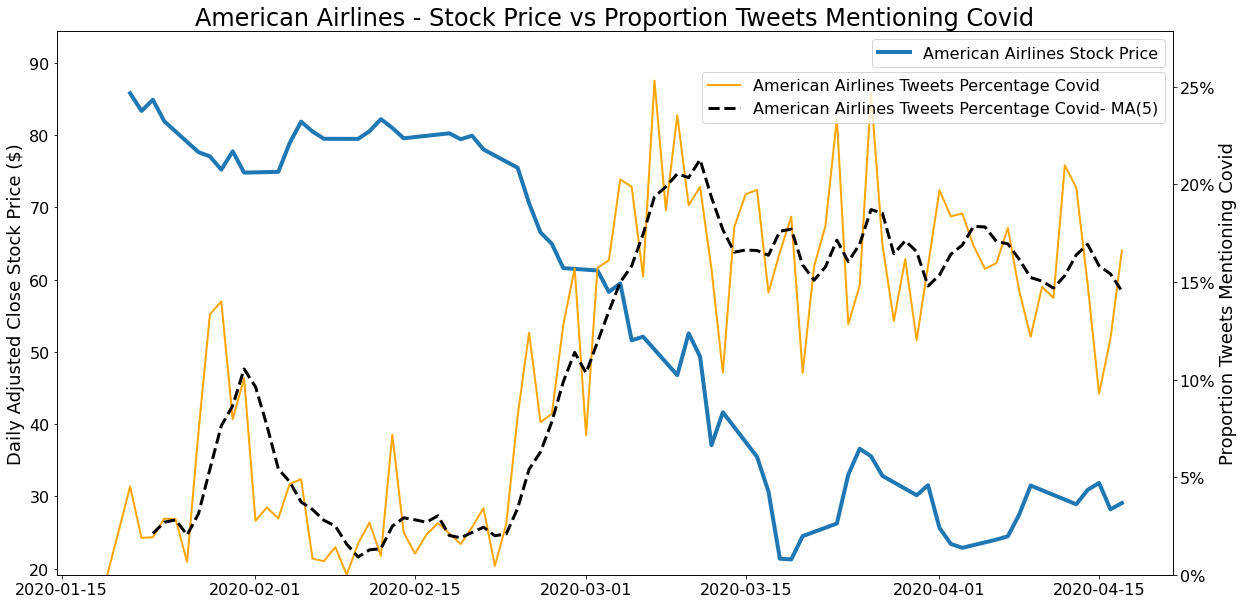

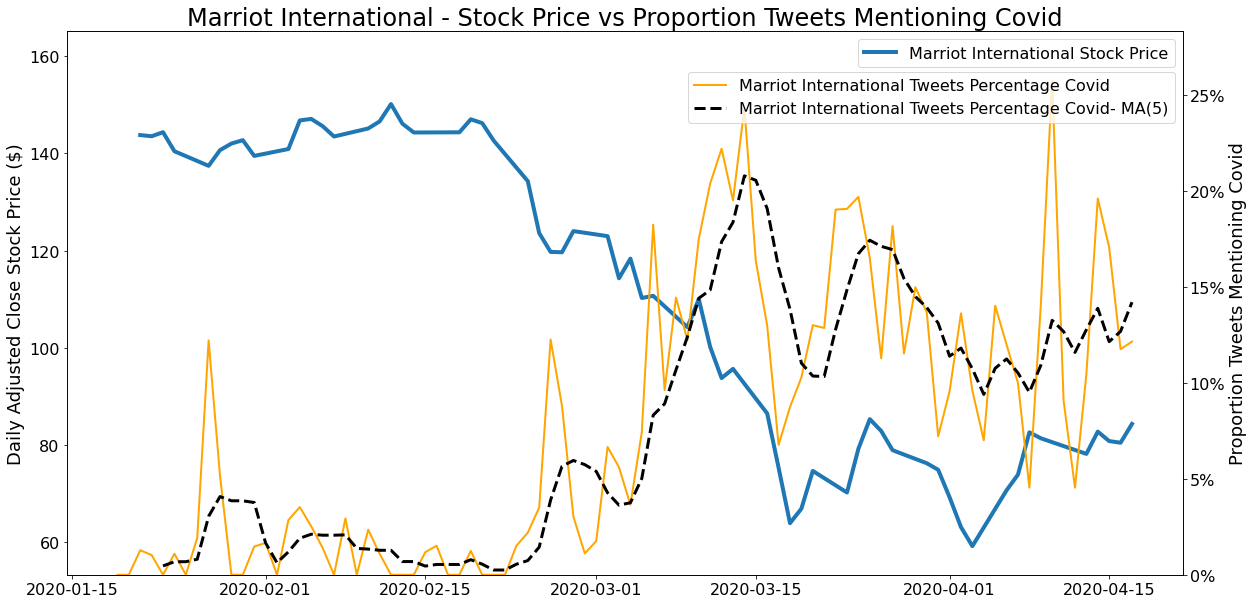

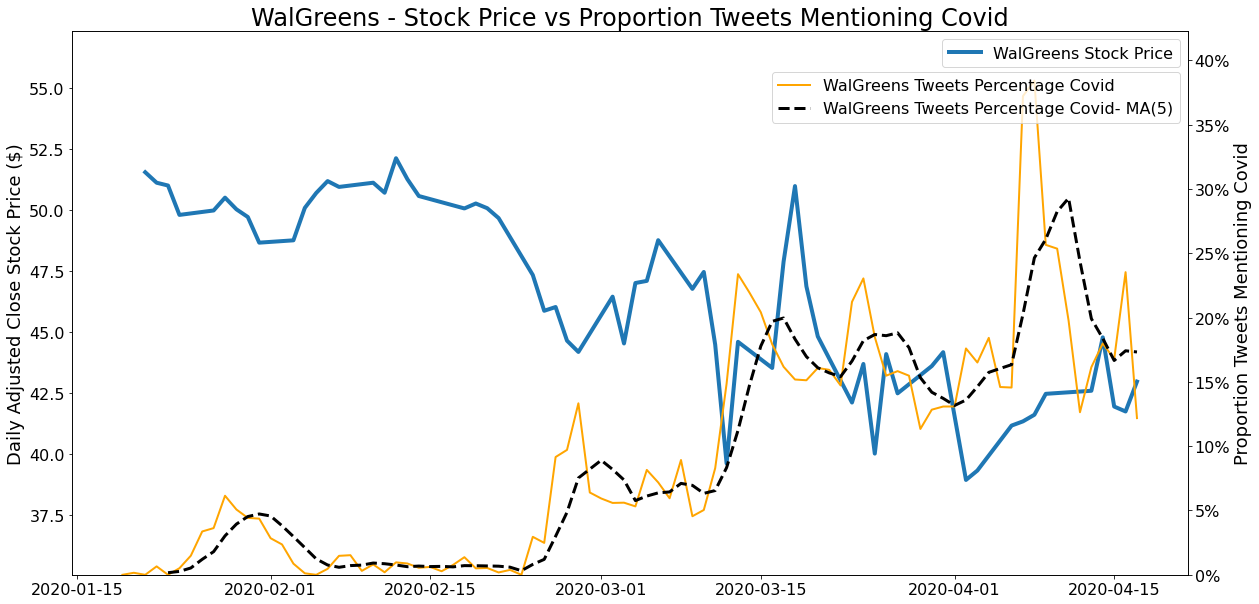

In [14]:
def CreateVolvsPercentageCovidMentionsChart(Tweetdf, ticker, Company):
    global ListofCovidTerms
    
    ListofCovidTerms = ['coronavirus', 'covid', 'covid19','mask','quarantine',
                        '#coronavirus', '#covid','#covid19','#mask','#quarantine']
    pattern = "|".join(ListofCovidTerms)

    # Make tweets lower case, see if it contains any any of the terms
    df = Tweetdf
    df['CovidTermContained'] = df.Text.apply(lambda x: x.lower()).str.contains(pattern).apply(lambda x: int(x))
    
    tweetdf = Tweetdf.pivot_table(index='Created', values='CovidTermContained', aggfunc=[np.sum, 'count'])
    tweetdf.index.names = ['Date']
    tweetdf.index = pd.to_datetime(tweetdf.index)
    tweetdf.columns = ['TweetsContainingCovid', 'GeneralTweets']
    tweetdf['ProportionTweetsCovid'] = tweetdf['TweetsContainingCovid']/tweetdf['GeneralTweets']
    tweetdf['ProportionCovid_MA'] = tweetdf['ProportionTweetsCovid'].rolling(window=5).mean()
    
    
    
    #Obtain Stockmarket Data
    stockdf = quandl.get(f"EOD/{ticker}", start_date='2020-1-19', end_date='2020-4-18')
        
    # Create the Chart
    fig = plt.figure(figsize=(20,10))
    ax1 = plt.axes()
    ax1.plot(stockdf.index, stockdf['Adj_Close'], linewidth=4, label=f"{Company} Stock Price")
    ax2 = ax1.twinx()
    ax2.plot(tweetdf.index,tweetdf['ProportionTweetsCovid'], color='orange', linewidth=2, label=f"{Company} Tweets Percentage Covid")
    ax2.plot(tweetdf.index,tweetdf['ProportionCovid_MA'], color='black', linewidth=3,
             linestyle="--", label=f"{Company} Tweets Percentage Covid- MA(5)")
    
    
    # Plot Titles        
    ax1.set_title(f'{Company} - Stock Price vs Proportion Tweets Mentioning Covid' ,size=24)
    ax1.set_ylabel('Daily Adjusted Close Stock Price ($)' ,size=18)
    ax2.set_ylabel('Proportion Tweets Mentioning Covid' ,size=18)
    ax1.set_ylim(min(stockdf['Adj_Close'])*0.9,max(stockdf['Adj_Close'])*1.1)
    ax2.set_ylim(min(tweetdf['ProportionTweetsCovid'])*0.9,max(tweetdf['ProportionTweetsCovid'])*1.1)
    
    # Axis sizes
    ax1.xaxis.set_tick_params(labelsize=16)
    ax1.yaxis.set_tick_params(labelsize=16)
    ax2.yaxis.set_tick_params(labelsize=16)
    
    ## Set up the Ranges on The y Axis
    ax1.set_ylim(min(stockdf['Adj_Close'])*0.9,max(stockdf['Adj_Close'])*1.1)
    ax2.set_ylim(min(tweetdf['ProportionTweetsCovid'])*0.9,
                 (max(tweetdf['ProportionTweetsCovid']))*1.1)
    vals = ax2.get_yticks()
    ax2.set_yticklabels([f"{x*100:.0f}%" for x in vals])        
    
    # Show the legend
    ax1.legend(prop={'size':16}, loc='upper right') 
    ax2.legend(prop={'size':16}, loc='upper right',bbox_to_anchor=(1, 0.94))        
    
    
    plt.show()


CreateVolvsPercentageCovidMentionsChart(UALTweets, 'UAL', 'American Airlines')
CreateVolvsPercentageCovidMentionsChart(MARTweets, 'MAR', 'Marriot International')
CreateVolvsPercentageCovidMentionsChart(WBATweets, 'WBA', 'WalGreens')

In [17]:
# Look at the Emojis we are looking to categorise.
print("\033[1mCovid Related Search Terms \033[0m")
print(ListofCovidTerms[:5])
print(ListofCovidTerms[5:])

Covid Related Search Terms 
['coronavirus', 'covid', 'covid19', 'mask', 'quarantine']
['#coronavirus', '#covid', '#covid19', '#mask', '#quarantine']


Looking at the proportion of tweets that are mentioning Covid, these look they are even more strongly negatively correlated with the stock price. 

They also look to be rising up at an earlier date than both the General number of mentions or the Number of mentions regarding Covid.

### Look at Emoji Sentiment vs Price

### Categorise the 20 Most Popular Emojis into Positive/Negative 

In [20]:
import re
# Create a list of the emojis and their respective counts
def CreateListEmojis(info, TweetList):
    emoji_list = []
    data = re.findall(u'[\U0001f600-\U0001f650]', info)
    for word in data:
        if any(re.findall(u'[\U0001f600-\U0001f650]', char) for char in word):
            try:
                FullListEmojis[word] += 1
            except KeyError:
                FullListEmojis[word] = 1
        else:
            print(word)
            
# Apply the above function to the dataframe, then return the top 20
def MostPopular20Emojis(df):  
    df.Text.apply(lambda x: CreateListEmojis(x, FullListEmojis))

    MostPopularEmojis = pd.DataFrame(FullListEmojis.items(), columns=["Emoji", "Count"])\
    .sort_values(by="Count", ascending=False).head(20)
    return MostPopularEmojis  
    

FullListEmojis = dict()   
print(f"\033[1mMost Popular Emojis - American Airline\033[0m")
MostPopularUAL = MostPopular20Emojis(UALTweets)
display(MostPopularUAL)
FullListEmojis = dict()  
print(f"\033[1mMost Popular Emojis - Marriot International\033[0m")
MostPopularMAR = MostPopular20Emojis(MARTweets)
display(MostPopularMAR)
FullListEmojis = dict()    
print(f"\033[1mMost Popular Emojis - WalGreens\033[0m")
MostPopularWBA = MostPopular20Emojis(WBATweets)
display(MostPopularWBA)


FullListEmojis = dict()
print(f"\033[1mMost Popular Emojis Amongst All Three\033[0m")
MostPopular20Emojis(UALTweets)
MostPopular20Emojis(MARTweets)
MostPopular20Emojis(WBATweets)

Most Popular Emojis - American Airline


,Emoji,Count
2,🙏,209
17,😭,181
14,😂,145
18,😡,97
20,🙄,96
5,🙌,74
12,😷,61
3,😍,54
19,😊,51
1,😢,45


Most Popular Emojis - Marriot International


,Emoji,Count
16,😂,64
1,🙏,58
12,😭,45
13,😡,34
10,😍,31
14,🙄,28
7,🙌,17
3,😎,15
4,😁,15
17,😳,14


Most Popular Emojis - WalGreens


,Emoji,Count
1,😂,1901
32,😭,1145
5,🙄,404
3,😩,324
16,😍,209
22,😡,202
0,🙃,200
13,🙌,187
15,🙏,176
7,😳,174


Most Popular Emojis Amongst All Three


,Emoji,Count
14,😂,2110
17,😭,1371
20,🙄,528
2,🙏,443
42,😩,355
18,😡,333
3,😍,294
5,🙌,278
8,🙃,248
12,😷,229


In [8]:
# Look at the Emojis we are looking to categorise.
print("\033[1m Emojis to characterise \033[0m")
pd.DataFrame(FullListEmojis.items(), columns=['Emoji', 'Count'])\
                .sort_values(['Count'], ascending=False).head(20)['Emoji'].values

 Emojis to characterise 


array(['😂', '😭', '🙄', '🙏', '😩', '😡', '😍', '🙌', '🙃', '😷', '😳', '😒', '😎',
       '😊', '😤', '😫', '😔', '😬', '😐', '😑'], dtype=object)

It seems the emojis being used in tweets for each of the three companies are generally quite similar. 

Therefore to make the process easlier have opted to use the 20 overall most popular emojis categorised into either positive or negative.

In [9]:
# Categorising the Most popular Overall Emojis
Positive = ['😂', '🙏', '😍', '🙌',  '😎', '😊']
Negative = ['😭','🙄','😩','😡','🙃', '😷', '😳', '😒','😤', '😫', '😔', '😬', '😐', '😑']
print(
    f"Number Positive : {len(Positive)}\n"
    f"Number Negative : {len(Negative)}\n"     
     )

Number Positive : 6
Number Negative : 14



In [10]:
print("\033[1m Emoji Categorisation - Stocks that Lost Share Price \033[0m")
print(f" Positive Emojis\n {[x for x in Positive]}")
print(f" Negative Emojis\n {[x for x in Negative]}")

 Emoji Categorisation - Stocks that Lost Share Price 
 Positive Emojis
 ['😂', '🙏', '😍', '🙌', '😎', '😊']
 Negative Emojis
 ['😭', '🙄', '😩', '😡', '🙃', '😷', '😳', '😒', '😤', '😫', '😔', '😬', '😐', '😑']


In [19]:
import re
### Create a Few functions to be used later
# Function to extract all of the unique emojis in the text
def extract_uniq_emojis(text):
    return np.unique([re.findall(u'[\U0001f600-\U0001f650]',char) 
                      for char in text 
                      if re.findall(u'[\U0001f600-\U0001f650]',char) != []])

# Create a count of the number of emojis in text part of the tweet
def split_count(info):
    emoji_list = []
    data = re.findall(u'[\U0001f600-\U0001f650]', info)
    for word in data:
        if any(re.findall(u'[\U0001f600-\U0001f650]', char) for char in word):
            emoji_list.append(word)

    return len(emoji_list)

# Create the sentiment score, 1 where the majority of emojis in the tweet are positive; 
# -1 where the majority of emojis in the tweet are negative;
# 0 otherwise (i.e. neutral)
def CreateEmojiSentiment(info):
    emoji_scores = []
    data = re.findall(u'[\U0001f600-\U0001f650]', info)
         
    tempscore = 0
    for word in data:   
        for char in word:       
            if char in Positive:
                tempscore += 1
            elif char in Negative:          
                tempscore -= 1
    if tempscore < 0:
        score = -1
    elif tempscore > 0:
        score = 1
    else:
        score = 0
        
    emoji_scores.append(score)

    return emoji_scores


#### Create the bit that puts all of the above functions together to create the additional columns

def CreateAdditionalColumns(df):
    df['Emojis'] = df.Text.apply(lambda x: extract_uniq_emojis(x))
    df['Emojis'] = df['Emojis'].apply(lambda x: "" if x.size == 0 else "".join(x))
    df["Emoji Count"] = df.Text.apply(split_count)
    df["Emoji Sentiment"] = df.Text.apply(lambda x: CreateEmojiSentiment(x))
    df["Emoji Sentiment"] = [sum(x) for x in df["Emoji Sentiment"]]
    df["Emoji Positive"] = df["Emoji Sentiment"].apply(lambda x: 1 if x>0 else 0)
    df["Emoji Negative"] = df["Emoji Sentiment"].apply(lambda x: 1 if x<0 else 0)
    return df
    
    
#### Apply the above function to each of the 3 Twitter datasets
UALTweets = CreateAdditionalColumns(UALTweets)
MARTweets = CreateAdditionalColumns(MARTweets)
WBATweets = CreateAdditionalColumns(WBATweets)  
# The sense check
[print(f"{x}\n") for x in WBATweets.sort_values('Emoji Sentiment').head(2).Text]
WBATweets.sort_values('Emoji Sentiment').head(2)

Hey @Walgreens don't you think that literally locking up toothpaste, deodorant, body wash, razor blades, and numerous other products in your store is a little much? 🙄 Oh, and your sales suck too. #damnImissRiteAid

Did some mini-grocery shopping at Walgreens bc there’s less people there 😭 Shout out to the goat



,Created,Text,User,Company,Symbol,TwitterTerm,CovidTermContained,Emojis,Emoji Count,Emoji Sentiment,Emoji Positive,Emoji Negative
33391,2020-03-11,Hey @Walgreens don't you think that literally ...,RiannNJ,Walgreens Boots Alliance Inc.,WBA,Walgreens,0,🙄,1,-1,0,1
17951,2020-03-28,Did some mini-grocery shopping at Walgreens bc...,mosdeedee,Walgreens Boots Alliance Inc.,WBA,Walgreens,0,😭,1,-1,0,1


### Look at Emoji Sentiment Count vs Price

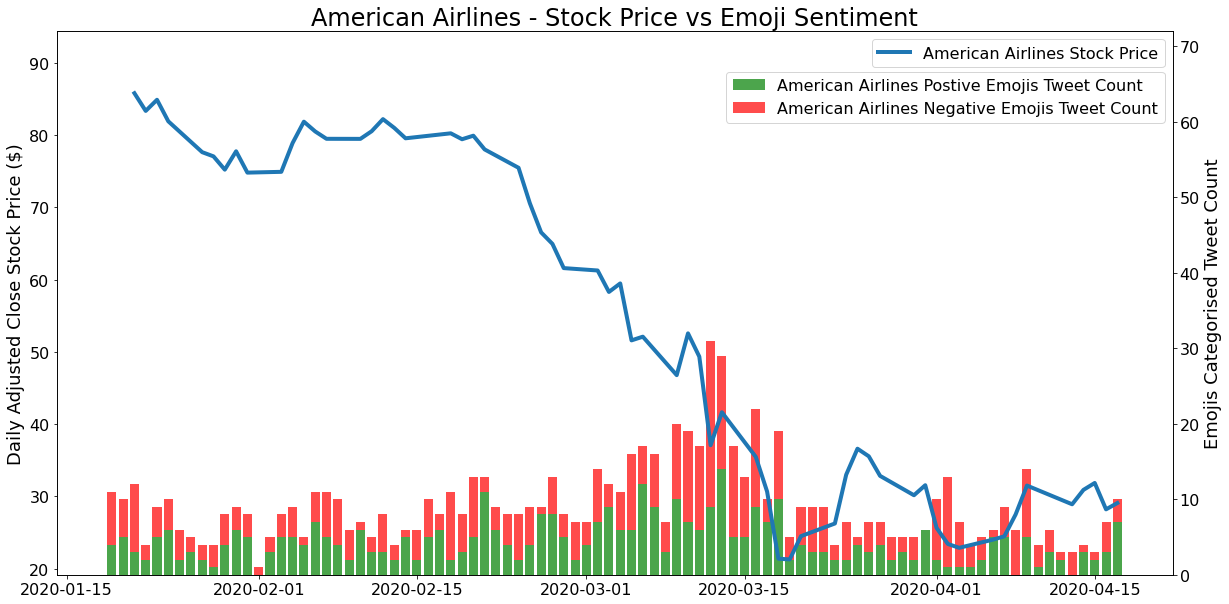

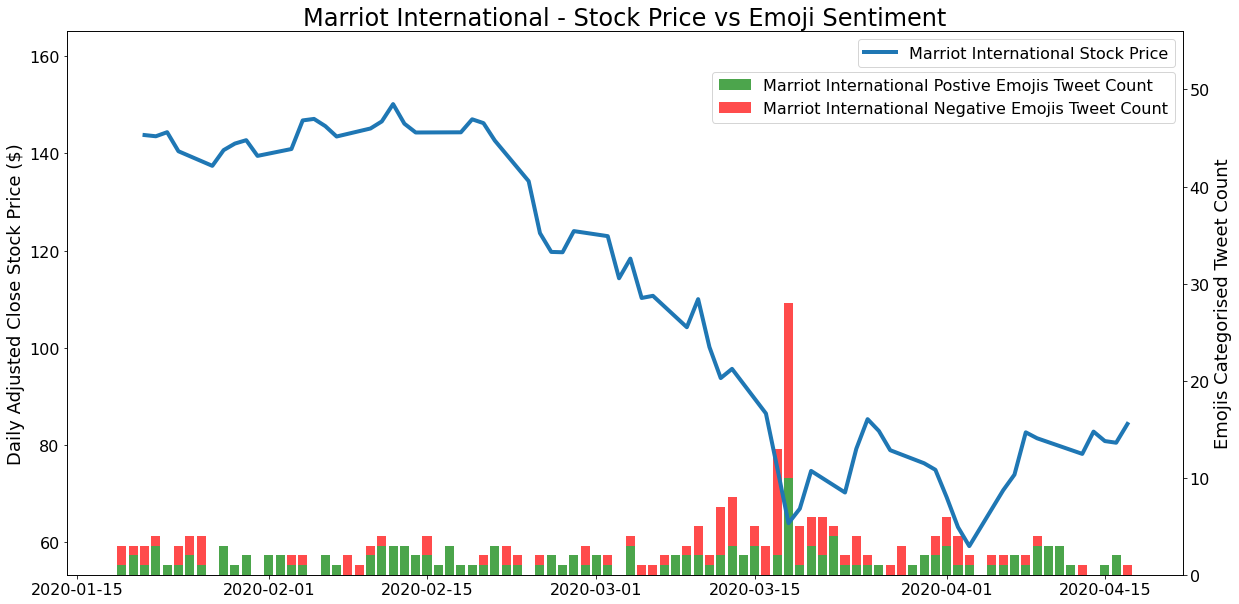

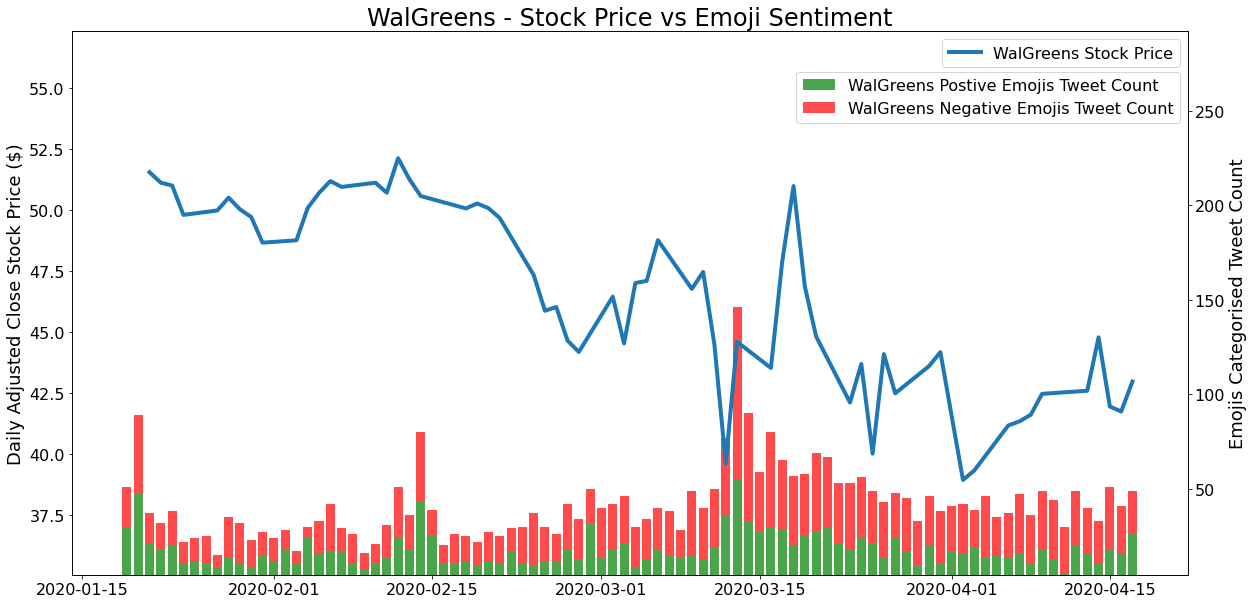

In [18]:
def CreatePricevsEmojiSentimentChart(Tweetdf, ticker, Company):
    tweetdf = Tweetdf.pivot_table(index='Created', values=['Emoji Positive', 'Emoji Negative'], aggfunc=np.sum)
    tweetdf.index.names = ['Date']
    tweetdf.index = pd.to_datetime(tweetdf.index)  
        
    #Obtain Stockmarket Data
    stockdf = quandl.get(f"EOD/{ticker}", start_date='2020-1-19', end_date='2020-4-18')
        
    # Create the Chart
    fig, ax1 = plt.subplots(figsize=(20,10))   

    ax1.set_zorder(1)  # default zorder is 0 for ax1 and ax2
    ax1.patch.set_visible(False)  # prevents ax1 from hiding ax2 
    
    
    # Plot the Bars
    ax1.plot(stockdf.index, stockdf['Adj_Close'], linewidth=4, label=f"{Company} Stock Price")
    ax2 = ax1.twinx()
    ax2.bar(tweetdf.index,tweetdf['Emoji Positive'], color='green', alpha=0.7, label=f"{Company} Postive Emojis Tweet Count")
    ax2.bar(tweetdf.index,tweetdf['Emoji Negative'],bottom = tweetdf['Emoji Positive'], color='red',
            alpha=0.7, label=f"{Company} Negative Emojis Tweet Count")
    
    
    # Plot Titles
    ax1.set_title(f'{Company} - Stock Price vs Emoji Sentiment' ,size=24)
    ax1.set_ylabel('Daily Adjusted Close Stock Price ($)' ,size=18)
    ax2.set_ylabel('Emojis Categorised Tweet Count' ,size=18)
    
    # Axis sizes
    ax1.xaxis.set_tick_params(labelsize=16)
    ax1.yaxis.set_tick_params(labelsize=16)
    ax2.yaxis.set_tick_params(labelsize=16)
    
    ## Set up the Ranges on The y Axis
    ax1.set_ylim(min(stockdf['Adj_Close'])*0.9,max(stockdf['Adj_Close'])*1.1)
    ax2.set_ylim(min(tweetdf['Emoji Positive'])*0.9,
                 (max(tweetdf['Emoji Positive'])+max(tweetdf['Emoji Negative']))*2)
    
    
    # Show the legend
    ax1.legend(prop={'size':16}, loc='upper right') 
    ax2.legend(prop={'size':16}, loc='upper right',bbox_to_anchor=(1, 0.94))           
    
    
    plt.show()


CreatePricevsEmojiSentimentChart(UALTweets, 'UAL', 'American Airlines')
CreatePricevsEmojiSentimentChart(MARTweets, 'MAR', 'Marriot International')
CreatePricevsEmojiSentimentChart(WBATweets, 'WBA', 'WalGreens')

Total number of Tweets in either buckets seems to signal similar to charts shown previously i.e. a rise in negative sentiment from March onwards, however this is towards the middle to end of the price drop.

### Look at Emoji Sentiment Sum vs Price

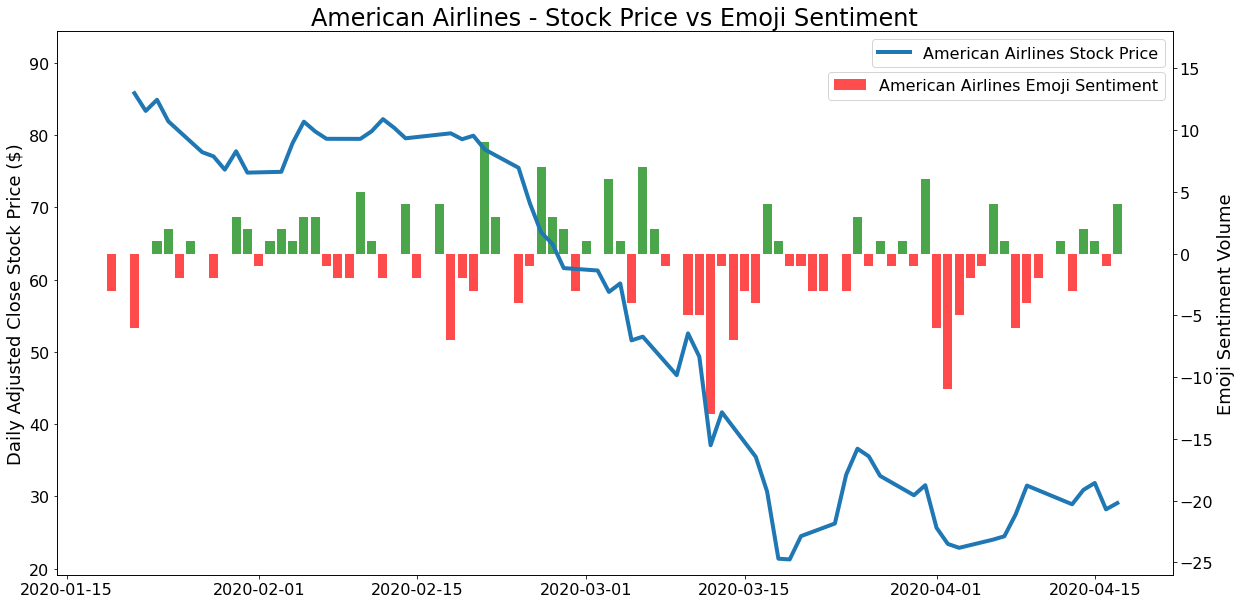

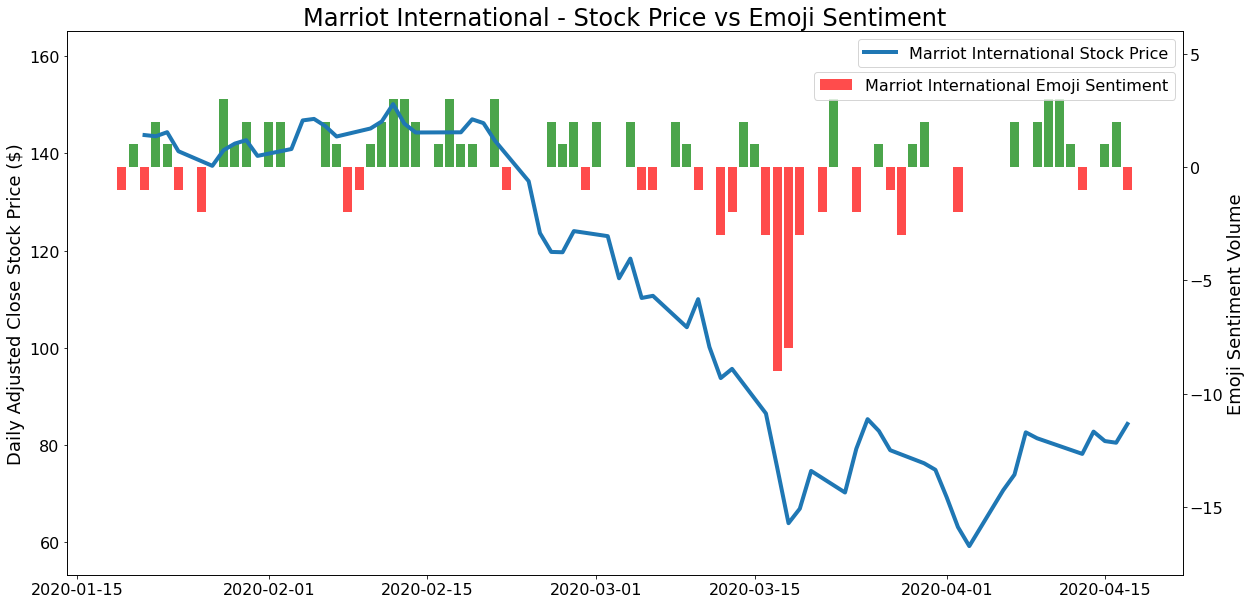

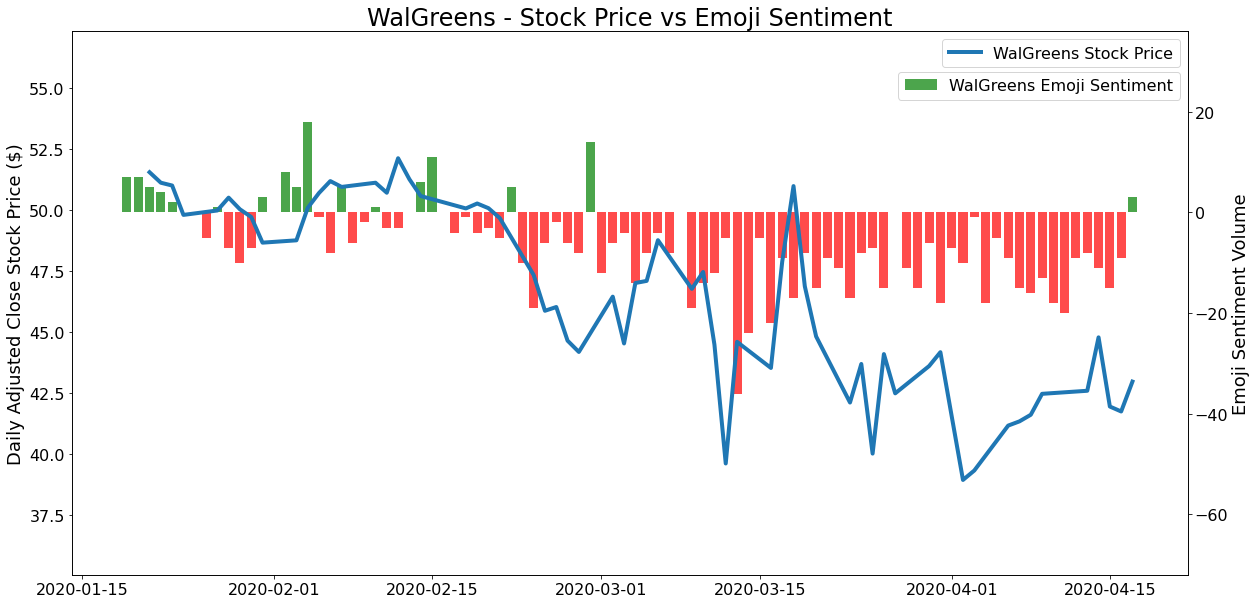

In [12]:
def CreatePricevsEmojiSentimentChart(Tweetdf, ticker, Company):
    #Manipulate the Twitter data such that it is in the format to be plotted by MatplotLib
    tweetdf = Tweetdf.pivot_table(index='Created', values='Emoji Sentiment', aggfunc=np.sum)
    tweetdf.index.names = ['Date']
    tweetdf.index = pd.to_datetime(tweetdf.index)   
    tweetdf['positive'] = tweetdf['Emoji Sentiment'] >0 
    
    #Obtain Stockmarket Data
    stockdf = quandl.get(f"EOD/{ticker}", start_date='2020-1-19', end_date='2020-4-18')
        
    # Create the Chart
    fig, ax1 = plt.subplots(figsize=(20,10))   

    ax1.set_zorder(1)  # default zorder is 0 for ax1 and ax2
    ax1.patch.set_visible(False)  # prevents ax1 from hiding ax2 
    
    
    # Plot the Bars
    ax1.plot(stockdf.index, stockdf['Adj_Close'], linewidth=4, label=f"{Company} Stock Price")
    ax2 = ax1.twinx()
    ax2.bar(tweetdf.index,tweetdf['Emoji Sentiment'], 
            color=tweetdf.positive.map({True: 'g', False: 'r'}),          
            alpha=0.7, label=f"{Company} Emoji Sentiment" )
    
    
    # Plot Titles    
    ax1.set_title(f'{Company} - Stock Price vs Emoji Sentiment' ,size=24)
    ax1.set_ylabel('Daily Adjusted Close Stock Price ($)' ,size=18)
    ax2.set_ylabel('Emoji Sentiment Volume' ,size=18)
    ax1.set_ylim(min(stockdf['Adj_Close'])*0.9,max(stockdf['Adj_Close'])*1.1)
    ax2.set_ylim(min(tweetdf['Emoji Sentiment'])*0.9,max(tweetdf['Emoji Sentiment'])*1.1)
    
    # Axis sizes
    ax1.xaxis.set_tick_params(labelsize=16)
    ax1.yaxis.set_tick_params(labelsize=16)
    ax2.yaxis.set_tick_params(labelsize=16)
    
    ## Set up the Ranges on The y Axis
    ax1.set_ylim(min(stockdf['Adj_Close'])*0.9,max(stockdf['Adj_Close'])*1.1)
    ax2.set_ylim(min(tweetdf['Emoji Sentiment'])*2,
                 (max(tweetdf['Emoji Sentiment']))*2)
    
    
    # Show the legend
    ax1.legend(prop={'size':16}, loc='upper right') 
    ax2.legend(prop={'size':16}, loc='upper right',bbox_to_anchor=(1, 0.94))        
    
    
    
    plt.show()


CreatePricevsEmojiSentimentChart(UALTweets, 'UAL', 'American Airlines')
CreatePricevsEmojiSentimentChart(MARTweets, 'MAR', 'Marriot International')
CreatePricevsEmojiSentimentChart(WBATweets, 'WBA', 'WalGreens')

For all three companies sentiment seems to shift to negative from March-20 onwards, this is towards the middle to end of the price drop for these companies.